# Deep Q- learning Agent- Stock Trading

### Import- Data and Functions

<b> 
    We begin with inputing following variables:
    - Stock1_name: this is first stock name, which is IBM - ibm.us
    - Stock2_name: this is second stock name, which is GE - ge.us
    - episode_count: This is number of episodes which agent till train on
    - Start_balance: This is the initial starting cash, which is $ 50,000
    - Training: This is number of records used for trading i.e. number of days on each episode of training will run
    - Test: This is number of days on which test run will be executed 
 
 </b>






In [1]:

from agent.agent import Agent
from state.state import State
import pandas as pd
from functions import *
import sys

import pandas as pd

import math, random 
import numpy as np 
from datetime import datetime, timedelta

#stock_name, window_size, episode_count = sys.argv[1], int(sys.argv[2]), int(sys.argv[3])

stock_name1,stock_name2, episode_count, start_balance, training, test = 'ibm.us','ge.us', 21,10000,1000,1500


pd_data1=pd.read_csv('data/ibm.us.txt', sep=",", header=0)
pd_data2=pd.read_csv('data/ge.us.txt', sep=",", header=0)




Using TensorFlow backend.


### Data Pre-processing

In this section we will do the following:
1. Look at the data of IBM and GE stock for checking anamolies (missing data etc.). Also convert date into right format
2. Make sure that both the stock data is for the same time period and same days in this time period. Remove data if necessary
3. Look at descriptive statistics of data- mean, median, number of records
4. Visualize the data to see how stock price changes with time
    

#### View IBM Stock data

In [2]:

pd_data1.head()


,Date,Open,High,Low,Close,Volume,OpenInt
0,1962-01-02,6.4130,6.4130,6.3378,6.3378,467056,0
1,1962-01-03,6.3378,6.3963,6.3378,6.3963,350294,0
2,1962-01-04,6.3963,6.3963,6.3295,6.3295,314365,0
3,1962-01-05,6.3211,6.3211,6.1958,6.2041,440112,0
4,1962-01-08,6.2041,6.2041,6.0373,6.0870,655676,0


#### View GE Stock data


In [3]:

pd_data2.head()


,Date,Open,High,Low,Close,Volume,OpenInt
0,1962-01-02,0.6277,0.6362,0.6201,0.6201,2575579,0
1,1962-01-03,0.6201,0.6201,0.6122,0.6201,1764749,0
2,1962-01-04,0.6201,0.6201,0.6037,0.6122,2194010,0
3,1962-01-05,0.6122,0.6122,0.5798,0.5957,3255244,0
4,1962-01-08,0.5957,0.5957,0.5716,0.5957,3696430,0


#### Date in Above data is not in Dateformat, so converting date to date format 

In [4]:
#Convert  Date to Date format
pd_data1['Date']=pd.to_datetime(pd_data1['Date'], format='%Y/%m/%d')
pd_data2['Date']=pd.to_datetime(pd_data2['Date'], format='%Y/%m/%d')

#### Desciptive statistics of IBM and GE data

IBM Stock- descriptive statistics

In [5]:
pd_data1.describe()

,Open,High,Low,Close,Volume,OpenInt
count,14059.000000,14059.000000,14059.000000,14059.000000,1.405900e+04,14059.0
mean,48.535548,48.987464,48.111897,48.554195,5.782966e+06,0.0
std,49.270969,49.663765,48.912626,49.297698,5.429533e+06,0.0
min,3.390100,3.565500,3.323500,3.390100,0.000000e+00,0.0
25%,13.238500,13.358000,13.145000,13.234000,1.471590e+06,0.0
50%,23.029000,23.213000,22.819000,23.029000,4.801835e+06,0.0
75%,77.383500,78.154000,76.743500,77.444500,8.224838e+06,0.0
max,186.010000,186.460000,185.060000,186.360000,8.316590e+07,0.0


GE Stock- descriptve statistics

In [6]:
pd_data2.describe()

,Open,High,Low,Close,Volume,OpenInt
count,14058.000000,14058.000000,14058.000000,14058.000000,1.405800e+04,14058.0
mean,10.534737,10.642538,10.421090,10.534161,2.423066e+07,0.0
std,11.742897,11.868891,11.612159,11.743726,3.369859e+07,0.0
min,0.459020,0.466900,0.451140,0.459020,0.000000e+00,0.0
25%,0.901500,0.909600,0.893800,0.901500,5.496950e+06,0.0
50%,3.880900,3.912700,3.824300,3.884800,1.597520e+07,0.0
75%,21.416000,21.658000,21.149250,21.370000,2.853667e+07,0.0
max,47.751000,48.459000,47.596000,48.056000,9.345354e+08,0.0


#### Drop Data that is not in both stock data- some days data is missing in IBM and some in GE

In [7]:
# Pre -Processing the Datasheet ...Drop Data that is not in both stock data- some days data is missing in Apple and some in Amazon
import datetime
#timestamp = data1_date[10]
#print(timestamp.strftime('%Y-%m-%d'))
list1= pd_data1['Date']
list2= pd_data2['Date']
diff_pd1_data = list(set(list1) - set(list2))
diff_pd2_data = list(set(list2) - set(list1))
#x11=x[0].strftime('%Y-%m-%d 00:00:00')
#p=datetime.datetime.strptime(x11, "%Y-%m-%d 00:00:00")
#print(p)
for k in range(len(diff_pd1_data)):
    pd1_dat_format=diff_pd1_data[k].strftime('%Y-%m-%d 00:00:00')
    date_format_pd1=datetime.datetime.strptime(pd1_dat_format, "%Y-%m-%d 00:00:00")
    for i, j in enumerate(list1):
        if j == date_format_pd1:
            #print(i)
            pd_data1=pd_data1.drop([i])            
pd_data1=pd_data1.reset_index(drop=True)

for k in range(len(diff_pd2_data)):
    pd2_dat_format=diff_pd2_data[k].strftime('%Y-%m-%d 00:00:00')
    date_format_pd2=datetime.datetime.strptime(pd2_dat_format, "%Y-%m-%d 00:00:00")
    for M, N in enumerate(list2):
        if N == date_format_pd2:
            #print(M)
            pd_data2=pd_data2.drop([M])
            
pd_data2=pd_data2.reset_index(drop=True) 


Now the data is clean, both IBM and GE have 14055 records

In [8]:
pd_data1.describe()

,Open,High,Low,Close,Volume,OpenInt
count,14055.000000,14055.000000,14055.000000,14055.000000,1.405500e+04,14055.0
mean,48.532594,48.984583,48.109053,48.551236,5.783121e+06,0.0
std,49.274761,49.667639,48.916453,49.301496,5.430147e+06,0.0
min,3.390100,3.565500,3.323500,3.390100,0.000000e+00,0.0
25%,13.238500,13.358000,13.145000,13.234000,1.471590e+06,0.0
50%,23.029000,23.213000,22.804000,23.029000,4.801272e+06,0.0
75%,77.383500,78.158000,76.752000,77.444500,8.226488e+06,0.0
max,186.010000,186.460000,185.060000,186.360000,8.316590e+07,0.0


In [9]:
pd_data2.describe()

,Open,High,Low,Close,Volume,OpenInt
count,14055.000000,14055.000000,14055.000000,14055.000000,1.405500e+04,14055.0
mean,10.536796,10.644616,10.423125,10.536218,2.423429e+07,0.0
std,11.743304,11.869305,11.612562,11.744135,3.370127e+07,0.0
min,0.459020,0.466900,0.451140,0.459020,0.000000e+00,0.0
25%,0.901500,0.909600,0.893800,0.901500,5.496950e+06,0.0
50%,3.880900,3.920600,3.832400,3.888700,1.597961e+07,0.0
75%,21.416000,21.658500,21.150000,21.372000,2.854301e+07,0.0
max,47.751000,48.459000,47.596000,48.056000,9.345354e+08,0.0


### Data Visualization

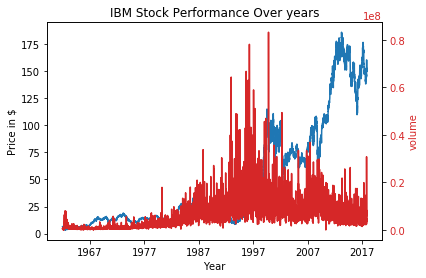

In [10]:
# Apple Stock Plot
import matplotlib.pyplot as plt
import datetime
import numpy as np

%matplotlib inline

x1 = np.array(pd_data1['Date'])
y1 = pd_data1['Open']
y12= pd_data1['Volume']

plt.title("IBM Stock Performance Over years")
plt.xlabel("Year")
plt.ylabel("Price in $")



plt.plot(x1,y1)


ax2 = plt.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('volume', color=color)  # we already handled the x-label with ax1
ax2.plot(x1, y12, color=color)
ax2.tick_params(axis='y', labelcolor=color)



plt.show()

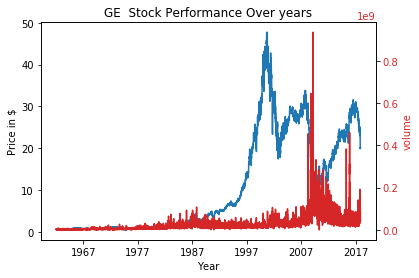

In [11]:
# GE Stock Plot
import matplotlib.pyplot as plt
import datetime
import numpy as np

%matplotlib inline

x2 = np.array(pd_data2['Date'])
y2 = pd_data2['Open']
y22= pd_data2['Volume']


plt.title("GE  Stock Performance Over years")
plt.xlabel("Year")
plt.ylabel("Price in $")

plt.plot(x2,y2)


ax2 = plt.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('volume', color=color)  # we already handled the x-label with ax1
ax2.plot(x2, y22, color=color)
ax2.tick_params(axis='y', labelcolor=color)




plt.show()

Next step is to divide data into training and test set. This has to be done in a chronological order. So, data is divided into:
- training set from days 0 to days 'training'
- test set: from days 'training' to day 'training+ test'

In [12]:
#Test Data
pd_data1_test=pd_data1[0:test]
pd_data2_test=pd_data2[0:test]

In [13]:



vol1_train=getStockVolVec(stock_name1)
vol2_train=getStockVolVec(stock_name2)


In [14]:
pd_data1_test=pd_data1_test.reset_index(drop=True)
pd_data2_test=pd_data2_test.reset_index(drop=True)

In [15]:
pd_data1_test.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1962-01-02,6.4130,6.4130,6.3378,6.3378,467056,0
1,1962-01-03,6.3378,6.3963,6.3378,6.3963,350294,0
2,1962-01-04,6.3963,6.3963,6.3295,6.3295,314365,0
3,1962-01-05,6.3211,6.3211,6.1958,6.2041,440112,0
4,1962-01-08,6.2041,6.2041,6.0373,6.0870,655676,0


In [16]:
pd_data2_test.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1962-01-02,0.6277,0.6362,0.6201,0.6201,2575579,0
1,1962-01-03,0.6201,0.6201,0.6122,0.6201,1764749,0
2,1962-01-04,0.6201,0.6201,0.6037,0.6122,2194010,0
3,1962-01-05,0.6122,0.6122,0.5798,0.5957,3255244,0
4,1962-01-08,0.5957,0.5957,0.5716,0.5957,3696430,0


## Benchmark model for Actual Test Run

In [17]:
#Initialize state and set benchmarking model


#print(df_data1)
total_Prof=[]
done=False

Act_datasize = test
batch_size = 64

#Benchmark Model

# Take Opening price in a new variable
data1_test=pd_data1_test['Open']
data2_test=pd_data2_test['Open']

data1_date=pd_data1_test['Date']



Act_Bench_Stock1_Bal=int(np.floor((start_balance/4)/data1_test[0]))
Act_Bench_Stock2_Bal=int(np.floor((start_balance/4)/data2_test[0]))
Act_Bench_Open_cash=start_balance/2




### Program to calculate benchmark profit


#sell 10% of stock in 10 intervals

interval=int(Act_datasize/10)
Total_Stock1_Amount= 0
Total_Stock2_Amount= 0
stocks2Value = 0
stocks1Value = 0

Act_stocks1=np.floor(Act_Bench_Stock1_Bal /10)
Act_stocks2=np.floor(Act_Bench_Stock2_Bal /10)
#print(str(Act_stocks1))
#print(str(Act_stocks2))

remaining_stock1=Act_Bench_Stock1_Bal
remaining_stock2=Act_Bench_Stock2_Bal
ttl=0

Benchmark_Port_Value=[]


for j in range (interval,Act_datasize+1,interval):
        #print("closing prices : " + str(data1_test[j-1]) )
        Price_closing_Stock1=data1_test[j-1]
        Price_closing_Stock2=data2_test[j-1]
        date_stock1=data1_date[j-1].strftime('%Y-%m-%d')
        #print(date_stock1)
        #np.array(pd_data1_test['Date'])
        
        stocks1Value= Act_stocks1 * Price_closing_Stock1
        stocks2Value= Act_stocks2 * Price_closing_Stock2
        remaining_stock1=remaining_stock1-Act_stocks1
        remaining_stock2=remaining_stock2-Act_stocks2
        #print("J is:"+ str(j))
        
        
        
        Stock1_Port_value=remaining_stock1*Price_closing_Stock1
        Stock2_Port_value=remaining_stock2*Price_closing_Stock2
        Act_Bench_Open_cash=Act_Bench_Open_cash+stocks1Value+stocks2Value #Adding 10% sold value into open cash
        
        Total_Portfolio_value=Act_Bench_Open_cash+Stock1_Port_value+Stock2_Port_value
        Benchmark_Port_Value.append([date_stock1,Total_Portfolio_value])
        



#print ("total_Test_Benchmark_amount : " +  str(Total_Portfolio_value))

Test_Benchmark_Portfolio_Value= Total_Portfolio_value




print("Benchmark_Profit is" + str(Test_Benchmark_Portfolio_Value) +"with Apple Stocks: " + str(remaining_stock1) + 
      " and Amazon stocks: "+ str(remaining_stock2) )


#Define arrays to store per episode values 
total_Prof=[]
total_stock1bal=[]
total_stock2bal=[]
total_open_cash=[]
total_port_value=[]
total_days_played=[]


print(episode_count)


Benchmark_Profit is10661.6136with Apple Stocks: 9.0 and Amazon stocks: 2.0
21


## Actual test Run

In [18]:
#Actual run

import csv
episode_count=0


#Define arrays to store per episode values 
total_Prof=[]
total_stock1bal=[]
total_stock2bal=[]
total_open_cash=[]
total_port_value=[]
total_days_played=[]

from keras.models import load_model

model_name='model_ep50'

model = load_model("models/" + model_name)

Act_Bench_Stock1_Bal=int(np.floor((start_balance/4)/data1_test[0]))
Act_Bench_Stock2_Bal=int(np.floor((start_balance/4)/data2_test[0]))
Act_Bench_Open_cash=start_balance/2


In [19]:
#Actual run

import csv
episode_count=0


#Define arrays to store per episode values 
Act_total_Prof=[]
Act_total_stock1bal=[]
Act_total_stock2bal=[]
Act_total_open_cash=[]
Act_total_port_value=[]
Act_total_days_played=[]
actions_done_perday=[]
portfolio_value=[]

from keras.models import load_model

model_name='model_ep50'

model = load_model("models/" + model_name)


for e in range(1): #here we run only for 1 episode, as it is Test run

    Bal_stock1_t2=Act_Bench_Stock1_Bal
    Bal_stock2_t2=Act_Bench_Stock2_Bal
    done=False
    open_cash_t2= Act_Bench_Open_cash  
    total_profit = 0
    reward = 0
    
    #Initialize Agent
    agent_test = Agent(8, is_eval=True, model_name=model_name)
    #agent = Agent(8)

    agent_test.inventory1 =[]
    agent_test.inventory2 =[]
    for i in range(Bal_stock1_t2):
        agent_test.inventory1.append(data1_test[0])
    for i in range(Bal_stock2_t2):
        agent_test.inventory2.append(data2_test[0]) 
    
    
    #Timestep delta to make sure that with time reward increases for taking action
    timestep_delta=0
    
    #Running episode over all days in the datasize
    for t in range(Act_datasize):
        print("..........")
        
        print(pd_data1_test.iloc[t,0])
        state_class_obj= State(data1_test, data2_test, Bal_stock1_t2, Bal_stock2_t2, open_cash_t2,t)
        state_array_obj=state_class_obj.getState()
        action = agent_test.act(state_array_obj)
        
        print("Total portfolio value: " + str(state_class_obj.portfolio_value)+ 
                  "  stock 1 number: " + str(len(agent_test.inventory1))
                   +"  stock 2 number: "+str(len(agent_test.inventory2))+"  open cash"+str(state_class_obj.open_cash))


        
        #reward should be more as time goes further. We will remove reward_timedelta from actual reward 
        #reward_timedelta=(datasize-t)*timestep_delta
        
                   
        change_percent_stock1=(state_class_obj.Stock1Price-state_class_obj.fiveday_stock1)/state_class_obj.fiveday_stock1*100
        change_percent_stock2=(state_class_obj.Stock2Price-state_class_obj.fiveday_stock2)/state_class_obj.fiveday_stock2*100
        
        #print("change_percent_stock1:  "+str(change_percent_stock1))
        #print("change_percent_stock2:  "+str(change_percent_stock2))
        
        
        if action == 0:  #buy stock 1
            if state_class_obj.Stock1Price > state_class_obj.open_cash:
                '''
                print("Buy stock 1 when it did not have cash, so bankrupt, end of episode")
                reward=-reward_timedelta*10
                done = True
                '''
                #If agent is trying to buy when it has no cash but has stock1 and stock2 balance then, 
                #it should pick from other actions
                #if (state_class_obj.Stock1Blnc>1) and  (state_class_obj.Stock2Blnc>1):
                 #   action=random.sample([1, 2, 4, 5, 6],  1)  # Choose 1 elements from sell actions
                #else:    
                #print("Bankrupt")
              
                done = True
                #end episode
                     
            else:
                #print("In Buy stock 1")
                agent_test.inventory1.append(data1_test[t])
                Bal_stock1_t2= len(agent_test.inventory1)
                Bal_stock2_t2=len(agent_test.inventory2)
                open_cash_t2=state_class_obj.open_cash-state_class_obj.Stock1Price #Here we are buying 1 stock
                
                
               
                
        if action == 1:  #sell stock 1
            if state_class_obj.Stock1Blnc <1 :
               # print("sold stock 2 when it did not have stock 2, so bankrupt, end of episode")
                
                done = True
                #end episode
            else:
                #print("In sell stock 1")
                agent_test.inventory1.pop(0)

                Bal_stock1_t2= len(agent_test.inventory1)
                Bal_stock2_t2=len(agent_test.inventory2)
                open_cash_t2=state_class_obj.open_cash+state_class_obj.Stock1Price #State[0] is the price of stock 1. Here we are buying 1 stoc
          
                 
        


        
        if action == 2:             # Do nothing action    
                Bal_stock1_t2= len(agent_test.inventory1)
                Bal_stock2_t2=len(agent_test.inventory2)
               # print("Do nothing")
        
        
        if action == 3:  #buy stock 2
            if state_class_obj.Stock2Price > state_class_obj.open_cash:
                '''
                print("Buy stock 2 when it did not have cash, so bankrupt, end of episode")
                reward=-reward_timedelta*10
                done = True
                
                '''
                #If agent is trying to buy when it has no cash but has stock1 and stock2 balance then, 
                #it should pick from other actions
                #if (state_class_obj.Stock1Blnc>1) and  (state_class_obj.Stock2Blnc>1):
                 #   action=random.sample([1, 2, 4, 5, 6],  1)  # Choose 1 elements from sell actions
                #else:    
                #print("Bankrupt")

                done = True
                     #end episode   
            else:
                #print("In Buy stock 2")
                agent_test.inventory2.append(data2_test[t])
                Bal_stock1_t2= len(agent_test.inventory1)
                Bal_stock2_t2=len(agent_test.inventory2)
                open_cash_t2=state_class_obj.open_cash-state_class_obj.Stock2Price
                
              
        
        if action == 4:  #sell stock 2
            if state_class_obj.Stock2Blnc <1 :
                    #print("sold stock 2 when it did not have stock 2, so bankrupt, end of episode")
                    done = True
                #end episode
            else:
                #print("In sell stock 2")
                agent_test.inventory2.pop(0)
                Bal_stock1_t2= len(agent_test.inventory1)
                Bal_stock2_t2=len(agent_test.inventory2)
                open_cash_t2=state_class_obj.open_cash+state_class_obj.Stock2Price
    

               # print("reward for selling stock2: " + str(reward))
            
        
        
        #print("reward:  "+str(reward))
        #if done!= False:done = True if t == datasize
        if t == Act_datasize-1:
            print("t==datasize")
            done=True
            next_state_class_obj=State(data1_test, data2_test, Bal_stock1_t2, Bal_stock2_t2, open_cash_t2,t)
            next_state_array_obj=next_state_class_obj.getState()
        else:
            print("t!=datasize"+str(open_cash_t2))
            next_state_class_obj=State(data1_test, data2_test, Bal_stock1_t2, Bal_stock2_t2, open_cash_t2,t+1)
            next_state_array_obj=next_state_class_obj.getState()
            
        print("Action is "+str(action)+" reward is" + str(reward))


       
        
        actions_done_perday.append(action)
        portfolio_value.append(next_state_class_obj.portfolio_value)

        if done==True:
            print("--------------------------------")
            print("Total Profit: " + formatPrice(total_profit))
            print("Total No. of days played: " + str(t)+ "  out of overall days:  " + str(Act_datasize))
            print("Total portfolio value: " + str(next_state_class_obj.portfolio_value)+ 
                  "  stock 1 number: " + str(len(agent_test.inventory1))
                   +"  stock 2 number: "+str(len(agent_test.inventory2))+"  open cash"+str(next_state_class_obj.open_cash))

            Act_total_Prof.append(total_profit)
            Act_total_stock1bal.append(len(agent_test.inventory1))
            Act_total_stock2bal.append(len(agent_test.inventory2))
            Act_total_open_cash.append(state_class_obj.open_cash)
            Act_total_port_value.append(state_class_obj.portfolio_value)
            Act_total_days_played.append(t)


            print("--------------------------------")
            state_class_obj.reset()
            break



..........
1962-01-02 00:00:00
Total portfolio value: 9994.1584  stock 1 number: 389  stock 2 number: 3982  open cash5000.0
t!=datasize5000.0
Action is 2 reward is0
..........
1962-01-03 00:00:00
Total portfolio value: 9934.6424  stock 1 number: 389  stock 2 number: 3982  open cash5000.0
t!=datasize5000.0
Action is 2 reward is0
..........
1962-01-04 00:00:00
Total portfolio value: 9957.3989  stock 1 number: 389  stock 2 number: 3982  open cash5000.0
t!=datasize5000.0
Action is 2 reward is0
..........
1962-01-05 00:00:00
Total portfolio value: 9896.6883  stock 1 number: 389  stock 2 number: 3982  open cash5000.0
t!=datasize5000.0
Action is 2 reward is0
..........
1962-01-08 00:00:00
Total portfolio value: 9785.4723  stock 1 number: 389  stock 2 number: 3982  open cash5000.0
t!=datasize5000.0
Action is 2 reward is0
..........
1962-01-09 00:00:00
Total portfolio value: 9753.0686  stock 1 number: 389  stock 2 number: 3982  open cash5000.0
t!=datasize5000.0
Action is 2 reward is0
..........

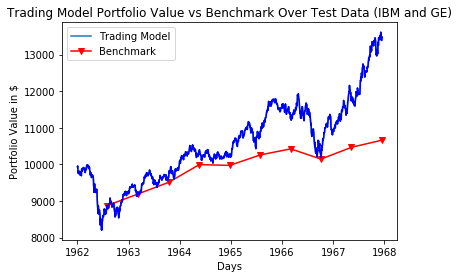

In [20]:
# Test Stock Prices and actions taken by agent Stock Plot
import matplotlib.pyplot as plt
import datetime
import numpy as np

%matplotlib inline

pd_bm=pd.DataFrame.from_records(Benchmark_Port_Value)
pd_bm[0]=pd.to_datetime(pd_bm[0], format='%Y/%m/%d')

x1 = np.array(pd_data1_test['Date'])
y1 = portfolio_value

x2=pd_bm[0]
y2=pd_bm[1]



plt.title("Trading Model Portfolio Value vs Benchmark Over Test Data (IBM and GE)")
plt.xlabel("Days")
plt.ylabel("Portfolio Value in $")

plt.plot(x1,y1)
plt.plot_date(x2, y2, c = 'red', marker='v', linestyle='-')


#plt.plot(x1, z, '-', color='black');
plt.plot(x1, y1, '-', color='blue');



#plt.scatter(x1,Benchmark_Port_Value,marker='o')

plt.legend(('Trading Model', 'Benchmark'))

plt.show()